<h3 style="color:maroon;">Imports</h3>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

<h3 style="color:maroon;">Visual aids</h3>

In [9]:
class Colors:
    RED = '\033[91m' + '\033[1m' + '\033[4m'
    GREEN = '\033[92m' + '\033[1m' + '\033[4m'
    YELLOW = '\033[93m' + '\033[1m' + '\033[4m'
    BLUE = '\033[94m' + '\033[1m' + '\033[4m'
    END = '\033[0m'

<h3 style="color:maroon;">A. Initial exploration</h3>

<h4 style="color:#874c62;">1. Import data</h4>

In [5]:
raw_data = pd.read_csv("Youtube01-Psy.csv")

<h4 style="color:#874c62;">2. Examination of properties of raw data frame</h4>

In [26]:
print(Colors.BLUE + "Shape of data frame:" + Colors.END)
print(raw_data.shape)
print("")

print(Colors.BLUE + "Data frame fields:" + Colors.END)
print(raw_data.columns)
print("")

print(Colors.BLUE + "Data frame info:" + Colors.END)
raw_data.info()
print("")

print(Colors.BLUE + "Unique entries per attribute:" + Colors.END)
print(raw_data.nunique())
print("")

print(Colors.BLUE + "Data frame head:" + Colors.END)
raw_data.head(3)


Shape of data frame:
(350, 5)

Data frame fields:
Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dtype='object')

Data frame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CONTENT     350 non-null    object
 4   CLASS       350 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB

Unique entries per attribute:
COMMENT_ID    350
AUTHOR        345
DATE          350
CONTENT       349
CLASS           2
dtype: int64

Data frame head:


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1


<h4 style="color:#874c62;">3. Analysis of raw data frame</h4>

<div style="background-color: rgba(120,120,200,0.25); padding: 10px;">
    <h5>Analysis of raw data frame<br></h5>
        <body>
            Main observations:
            <ol>
                <li>The data set contains 350 entries and 5 attributes.</li>
                <li>None of the fields in the data set are empty.</li>
                <li>Fields,<b>COMMENT_ID, AUTHOR,DATE, CONTENT</b> contain mostly unique values, hence they will be ignored in classifying the <b>CONTENT</b> class.</li>
            </ol>
    </body>
</div>

<h4 style="color:#874c62;">4. Summary examination of <b>CONTENT</b> field.</h4>

In [81]:
# Max length of CONTENT field
max_length_comment = raw_data["CONTENT"].str.len().max()
print(Colors.BLUE + "Max length of content:" + Colors.END)
print(max_length_comment)
print("")

# Min length of CONTENT field
min_length_comment = raw_data["CONTENT"].str.len().min()
print(Colors.BLUE + "Min length of content:" + Colors.END)
print(min_length_comment)
print("")

# Max length of spam comment
max_length_comment_spam = raw_data.loc[raw_data["CLASS"] == 1, "CONTENT"].str.len().max()
print(Colors.BLUE + "Max length of spam content:" + Colors.END)
print(max_length_comment_spam)
print("")

# Min length of spam comment
max_length_comment_ham = raw_data.loc[raw_data["CLASS"] == 0, "CONTENT"].str.len().max()
print(Colors.BLUE + "Max length of ham content:" + Colors.END)
print(max_length_comment_ham)
print("")

# Max length of ham comment
min_length_comment_spam = raw_data.loc[raw_data["CLASS"] == 1, "CONTENT"].str.len().min()
print(Colors.BLUE + "Min length of spam content:" + Colors.END)
print(min_length_comment_spam)
print("")

# Min legnth of ham comment
min_length_comment_ham = raw_data.loc[raw_data["CLASS"] == 0, "CONTENT"].str.len().min()
print(Colors.BLUE + "Min length of ham content:" + Colors.END)
print(min_length_comment_ham)
print("")

# Print longest spam comment
filtered_data_class = raw_data[raw_data["CLASS"] == 1]
longest_content_class = filtered_data_class.loc[filtered_data_class["CONTENT"].str.len().idxmax(), "CONTENT"]
print(Colors.BLUE + "Longest spam comment:" + Colors.END)
print(longest_content_class)
print("")

# Print shortest spam comment
filtered_data_class = raw_data[raw_data["CLASS"] == 1]
shortest_content_class = filtered_data_class.loc[filtered_data_class["CONTENT"].str.len().idxmin(), "CONTENT"]
print(Colors.BLUE + "Shortest spam comment:" + Colors.END)
print(shortest_content_class)
print("")

# Print longest hamm comment
filtered_data_class = raw_data[raw_data["CLASS"] == 0]
longest_content_class = filtered_data_class.loc[filtered_data_class["CONTENT"].str.len().idxmax(), "CONTENT"]
print(Colors.BLUE + "Longest ham comment:" + Colors.END)
print(longest_content_class)
print("")

filtered_data_class = raw_data[raw_data["CLASS"] == 0]
shortest_content_class = filtered_data_class.loc[filtered_data_class["CONTENT"].str.len().idxmin(), "CONTENT"]
print(Colors.BLUE + "Shortest ham comment:" + Colors.END)
print(shortest_content_class)
print("")

Max length of content:
1078

Min length of content:
4

Max length of spam content:
1078

Max length of ham content:
753

Min length of spam content:
14

Min length of ham content:
4

Longest spam comment:
im sorry for the spam but My name is Jenny. I go to high school where  everyone dresses fashionable but for me I don't because i need money to buy  cute clothes. I have low self esteem . I live with my dad. my mom passed  away when i was 6 so i don't really have a mother figure. I have 2 brothers  who is older than me. Since they are boys they get the attention while i  just be alone. I really want to wear pretty clothes like the girls in my  school and get a boyfriend. i just can't be my self. im very quite and shy  at school because i don't have the confidence in myself to talk to someone.  i did have one friend name Caroline but she moved away so now im alone. if  you could donate some money to me it would be great. i don't care about  expensive brand ill just shop at walmart becau

<h4 style="color:#874c62;">5. Visual examination of <b>CONTENT</b> field.</h4>

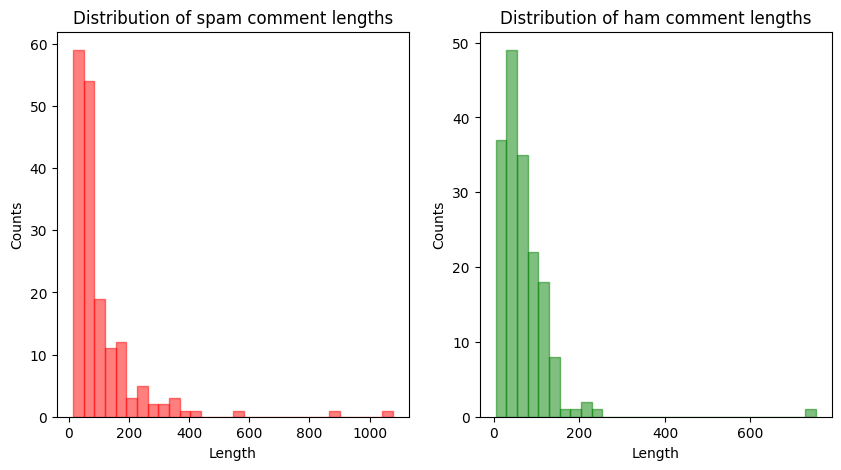

In [65]:
# Get lengths of all spam and ham comments
spam_lengths = raw_data.loc[raw_data["CLASS"]==1, "CONTENT"].str.len()
ham_lengths = raw_data.loc[raw_data["CLASS"]==0, "CONTENT"].str.len()

# Plot distribution of spam and ham lengths
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].hist(spam_lengths, bins=30, color="red", edgecolor="red", alpha=0.5)
ax[0].set_title("Distribution of spam comment lengths")
ax[0].set_xlabel("Length")
ax[0].set_ylabel("Counts")

ax[1].hist(ham_lengths, bins=30, color="green", edgecolor="green", alpha=0.5)
ax[1].set_title("Distribution of ham comment lengths")
ax[1].set_xlabel("Length")
ax[1].set_ylabel("Counts")

plt.show()

<h4 style="color:#874c62;">6. Analysis of <b>CONTENT</b> field.</h4>

<div style="background-color: rgba(120,120,200,0.25); padding: 10px;">
    <h5>Analysis of COMMENTS<br></h5>
        <body>
            <ul>
                <li>
                    Based on a summary statistical analysis there aren't many features that distinguish between spam and ham comments.
                </li>
                <li>
                    Both spam and ham comments show similarly skewed distribution, with most of them having total character counts bounded between 0 - 200 characters. 
                </li>
                <li>
                    The longest spam message has more characters than the longest ham message, however, the statistical relevance of this is undecided.
                </li>
                <li>
                    It is not immediately clear if including content length as a feature will improve the performance of a classifier.
                </li>
            </ul>
    </body>
</div>

<h3 style="color:maroon;">B. Data preparation</h3>

<h4 style="color:#874c62;">1. Prepare new dataframe with only <b>CONTENT</b> and <b>CLASS</b>fields.</h4>

In [87]:
# Create new dataframe with appropriate fields
proc_data = raw_data[["CLASS","CONTENT"]]

# Inspect the dataframe
print(Colors.BLUE + "Shape of data frame:" + Colors.END)
print(proc_data.shape)
print("")

print(Colors.BLUE + "Data frame fields:" + Colors.END)
print(proc_data.columns)
print("")

print(Colors.BLUE + "Data frame info:" + Colors.END)
proc_data.info()
print("")

print(Colors.BLUE + "Unique entries per attribute:" + Colors.END)
print(proc_data.nunique())
print("")

print(Colors.BLUE + "Data frame head:" + Colors.END)
proc_data.head(3)


Shape of data frame:
(350, 2)

Data frame fields:
Index(['CLASS', 'CONTENT'], dtype='object')

Data frame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CLASS    350 non-null    int64 
 1   CONTENT  350 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.6+ KB

Unique entries per attribute:
CLASS        2
CONTENT    349
dtype: int64

Data frame head:


,CLASS,CONTENT
0,1,"Huh, anyway check out this you[tube] channel: ..."
1,1,Hey guys check out my new channel and our firs...
2,1,just for test I have to say murdev.com
